**Problem**:-

Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('instagram_reach.csv')

In [3]:
df.head() # First five rows

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.shape # Shape of data

(100, 8)

In [5]:
df.isnull().sum() # Checking missing

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [6]:
df.duplicated().sum() # check duplicated rows

0

In [7]:
df.dropna(inplace=True)  # Drop missing values

In [8]:
# drop unnecessary column

df.drop(columns=['Unnamed: 0','S.No','USERNAME'],axis=1,inplace=True) 

In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Caption            94 non-null     object
 1   Followers          94 non-null     int64 
 2   Hashtags           94 non-null     object
 3   Time since posted  94 non-null     object
 4   Likes              94 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 4.4+ KB


Only Followers and Likes has Numerical data types

In [10]:
df.describe()  # Statistical description

,Followers,Likes
count,94.000000,94.000000
mean,942.627660,47.882979
std,1023.894946,56.501757
min,11.000000,8.000000
25%,231.000000,19.000000
50%,593.500000,29.500000
75%,1177.000000,46.000000
max,4496.000000,349.000000


In [11]:
# Convert Time since posted column into numerical
df['Time since posted'] = df['Time since posted'].apply(lambda x: x.split(' ',)[0]).astype(int)

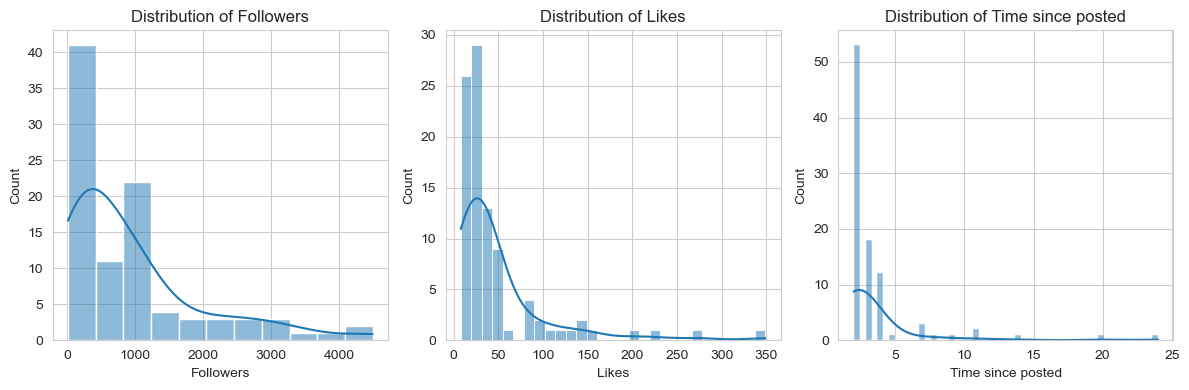

In [12]:
plt.figure(figsize=(12, 4)) #Figure size
sns.set_style(style='whitegrid')  # style

#For Followers
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Followers', kde=True)
plt.title('Distribution of Followers')

#For Likes
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Likes', kde=True)
plt.title('Distribution of Likes')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Time since posted', kde=True)
plt.title('Distribution of Time since posted')

plt.tight_layout()
plt.show()


Followers,Likes and Time since posted have a Right skew Distribution

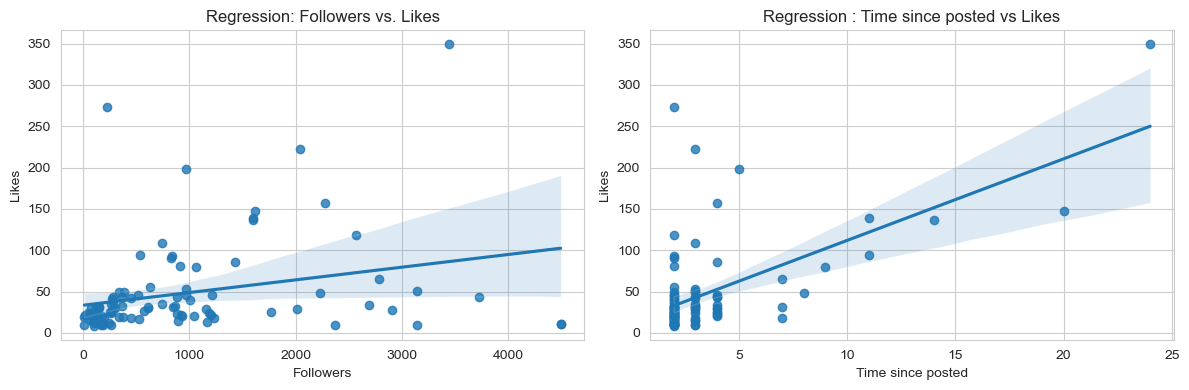

In [13]:
#Regression Plot
plt.figure(figsize=(12, 4))
sns.set_style(style='whitegrid')


plt.subplot(1, 2, 1)
sns.regplot(data=df, x='Followers', y='Likes')
plt.title('Regression: Followers vs. Likes')

plt.subplot(1, 2, 2)
sns.regplot(x='Time since posted', y='Likes', data=df)
plt.title('Regression : Time since posted vs Likes')


plt.tight_layout()
plt.show()


1. More Followers does not have much impact to get more Likes
2. More time dose not have much impact to get more Likes

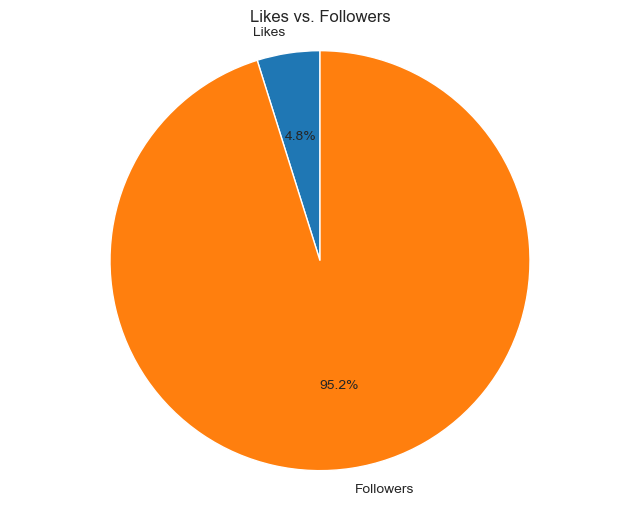

In [14]:
#Relationship between Likes and Followers
likes_sum = df['Likes'].sum()
followers_sum = df['Followers'].sum()

# Create data for the pie chart
data = [likes_sum, followers_sum]
labels = ['Likes', 'Followers']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Likes vs. Followers')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

#### Handling Skewness in Data

In [15]:
import scipy.stats as stats

Text(0.5, 0, 'Expected Quantiles')

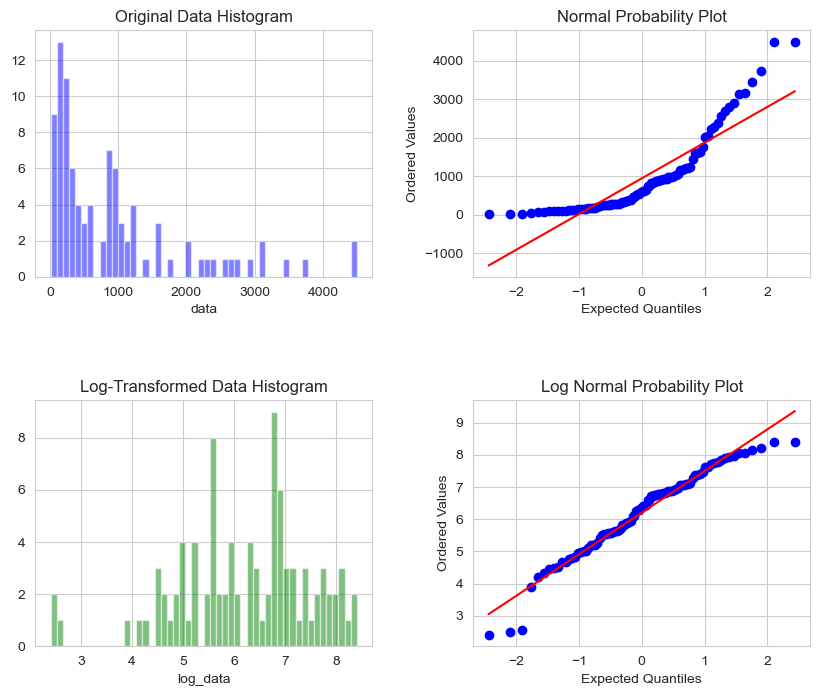

In [16]:
#Apply Log Transformation
# histogram
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # specify horizontal and vertical spacing    
ax[0, 0].hist(df['Followers'], bins=50, color='blue', alpha=0.5)
ax[0, 0].set_title('Original Data Histogram')
ax[0, 0].set_xlabel('data')

# normal probability plot
stats.probplot(df['Followers'], dist='norm', plot=ax[0, 1])
ax[0, 1].set_title('Normal Probability Plot')
ax[0, 1].set_xlabel('Expected Quantiles')

# log transformation
log_variable = np.log(df['Followers'])
ax[1, 0].hist(log_variable, bins=50, color='green', alpha=0.5)
ax[1, 0].set_title('Log-Transformed Data Histogram')
ax[1, 0].set_xlabel('log_data')
stats.probplot(log_variable, dist='norm', plot=ax[1, 1])
ax[1, 1].set_title('Log Normal Probability Plot')
ax[1, 1].set_xlabel('Expected Quantiles')

Text(0.5, 0, 'Expected Quantiles')

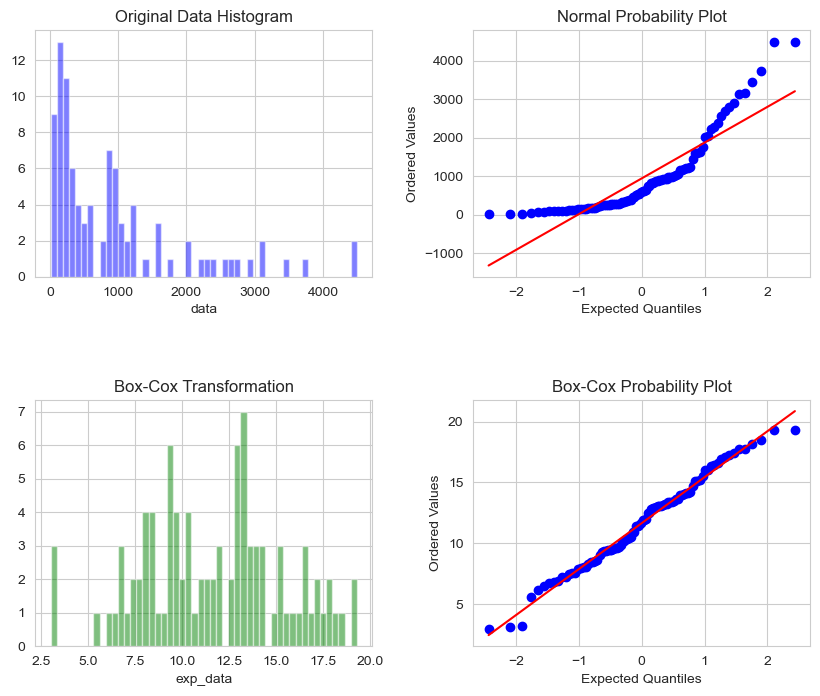

In [17]:
# BoxCox Transformation
# histogram
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # specify horizontal and vertical spacing    
ax[0, 0].hist(df['Followers'], bins=50, color='blue', alpha=0.5)
ax[0, 0].set_title('Original Data Histogram')
ax[0, 0].set_xlabel('data')

# normal probability plot
stats.probplot(df['Followers'], dist='norm', plot=ax[0, 1])
ax[0, 1].set_title('Normal Probability Plot')
ax[0, 1].set_xlabel('Expected Quantiles')

# boxcox transformation
boxcox_variable, _ = stats.boxcox(df['Followers'])
ax[1, 0].hist(boxcox_variable, bins=50, color='green', alpha=0.5)
ax[1, 0].set_title('Box-Cox Transformation')
ax[1, 0].set_xlabel('exp_data')
stats.probplot(boxcox_variable, dist='norm', plot=ax[1, 1])
ax[1, 1].set_title('Box-Cox Probability Plot')
ax[1, 1].set_xlabel('Expected Quantiles')


1. Comparision with Log Normal and Box-Cox Transformation. BoxCox Transforation much better for Followers Column

Text(0.5, 0, 'Expected Quantiles')

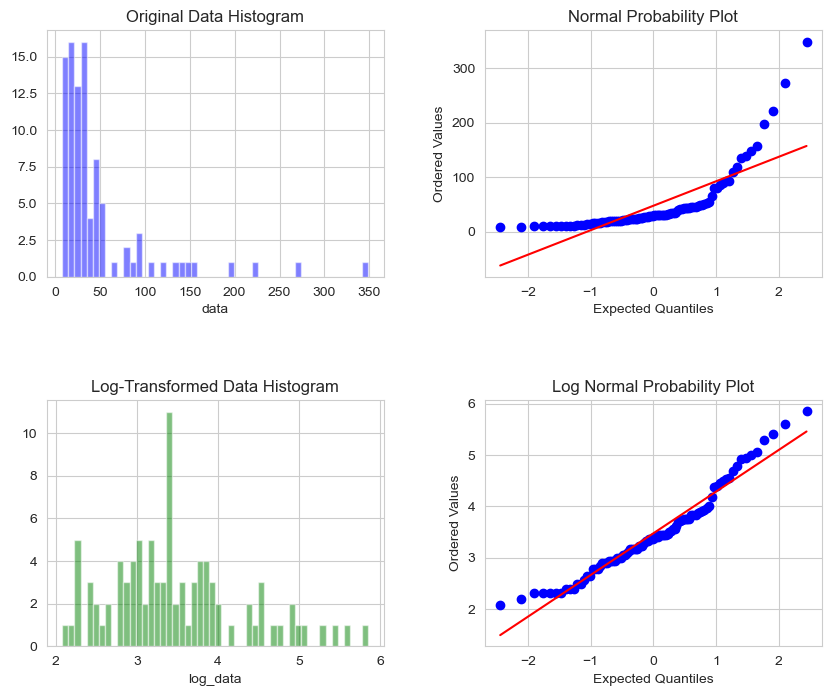

In [18]:
# Apply Log Normal
# histogram
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # specify horizontal and vertical spacing    
ax[0, 0].hist(df['Likes'], bins=50, color='blue', alpha=0.5)
ax[0, 0].set_title('Original Data Histogram')
ax[0, 0].set_xlabel('data')

# normal probability plot
stats.probplot(df['Likes'], dist='norm', plot=ax[0, 1])
ax[0, 1].set_title('Normal Probability Plot')
ax[0, 1].set_xlabel('Expected Quantiles')

# log transformation
log_variable = np.log(df['Likes'])
ax[1, 0].hist(log_variable, bins=50, color='green', alpha=0.5)
ax[1, 0].set_title('Log-Transformed Data Histogram')
ax[1, 0].set_xlabel('log_data')
stats.probplot(log_variable, dist='norm', plot=ax[1, 1])
ax[1, 1].set_title('Log Normal Probability Plot')
ax[1, 1].set_xlabel('Expected Quantiles')

Text(0.5, 0, 'Expected Quantiles')

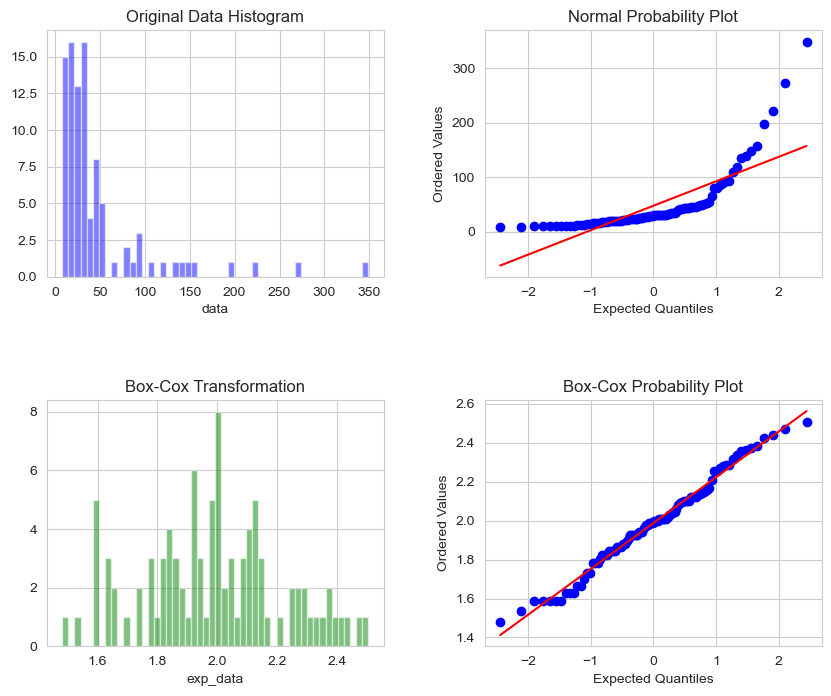

In [19]:
#Apply Box-Cox
# histogram
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # specify horizontal and vertical spacing    
ax[0, 0].hist(df['Likes'], bins=50, color='blue', alpha=0.5)
ax[0, 0].set_title('Original Data Histogram')
ax[0, 0].set_xlabel('data')

# normal probability plot
stats.probplot(df['Likes'], dist='norm', plot=ax[0, 1])
ax[0, 1].set_title('Normal Probability Plot')
ax[0, 1].set_xlabel('Expected Quantiles')

# boxcox transformation
boxcox_variable, _ = stats.boxcox(df['Likes'])
ax[1, 0].hist(boxcox_variable, bins=50, color='green', alpha=0.5)
ax[1, 0].set_title('Box-Cox Transformation')
ax[1, 0].set_xlabel('exp_data')
stats.probplot(boxcox_variable, dist='norm', plot=ax[1, 1])
ax[1, 1].set_title('Box-Cox Probability Plot')
ax[1, 1].set_xlabel('Expected Quantiles')


1. Comparision with Log Normal and Box-Cox Transformation. BoxCox Transforation much better for Likes Column

In [20]:
# Apply box-cox transformation on Followers and Likes Columns
df['Followers'],_ = stats.boxcox(df['Followers'])
df['Likes'],_ = stats.boxcox(df['Likes'])  

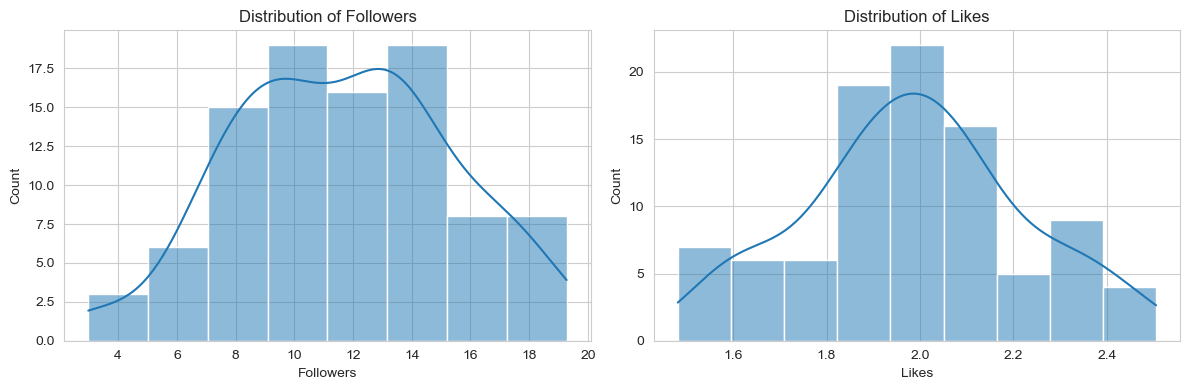

In [21]:
#Check distribuion of Followers and Likes
plt.figure(figsize=(12, 4)) #Figure size
sns.set_style(style='whitegrid')  # style

#For Followers
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Followers', kde=True)
plt.title('Distribution of Followers')

#For Likes
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Likes', kde=True)
plt.title('Distribution of Likes')

plt.tight_layout()
plt.show()

In [22]:
#Checking caption length
df['Caption_length']=df['Caption'].apply(len)

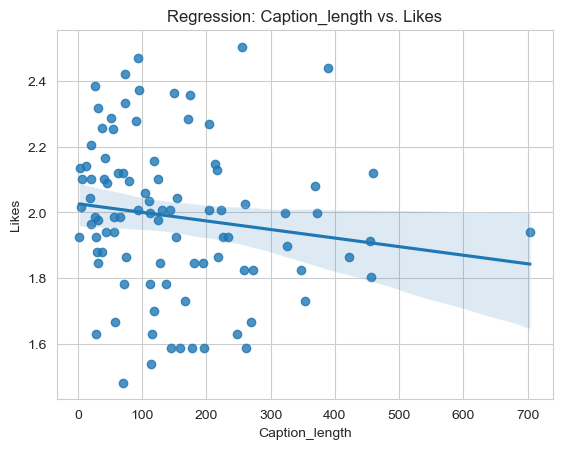

In [23]:
#Regression Plot

sns.set_style(style='whitegrid')

sns.regplot(data=df, x='Caption_length', y='Likes')
plt.title('Regression: Caption_length vs. Likes')

plt.show()

In [24]:
#For visualizing most frequent word in Caption and Hastag
from wordcloud import WordCloud

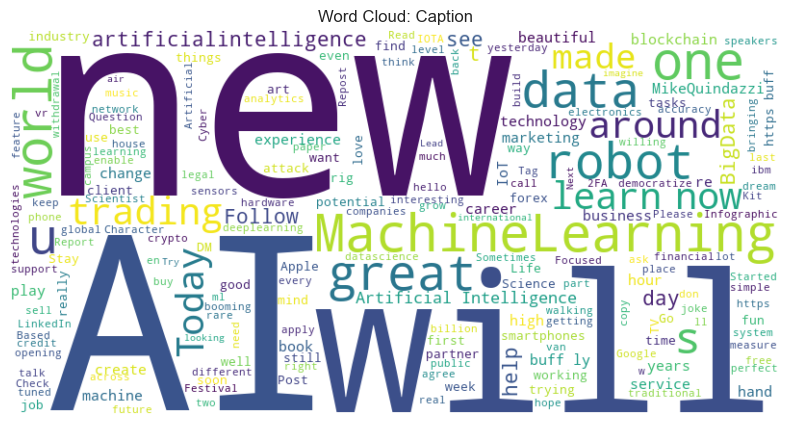

In [25]:
# For 'Caption'
text = ' '.join(df['Caption'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Caption')
plt.show()

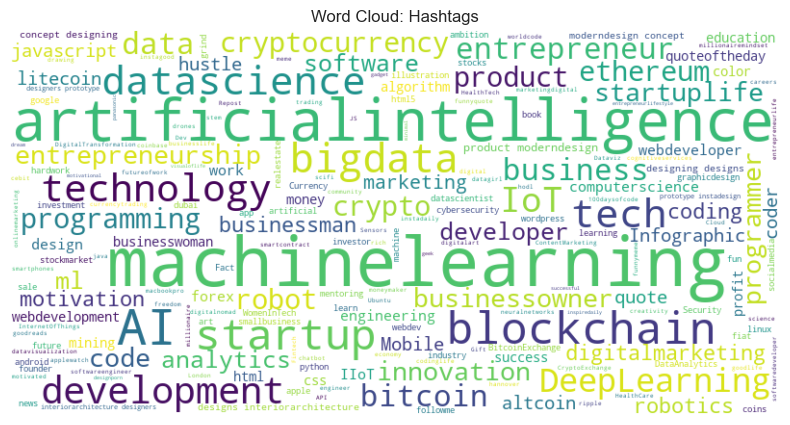

In [26]:
# For 'Hashtags'
text = ' '.join(df['Hashtags'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Hashtags')
plt.show()

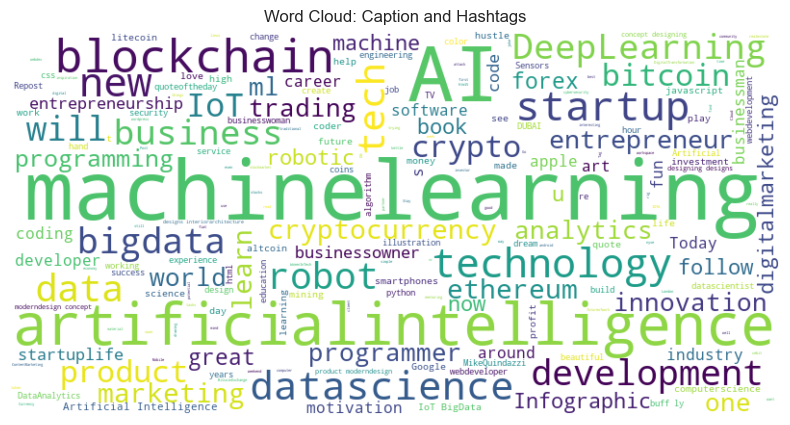

In [27]:
# Concatenate the 'Caption' and 'Hashtags' columns into a single text variable
text = ' '.join(df['Caption']) + ' ' + ' '.join(df['Hashtags'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Caption and Hashtags')
plt.show()

C:\Users\miqba\AppData\Local\Temp\ipykernel_30340\4211428607.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True)


<Axes: >

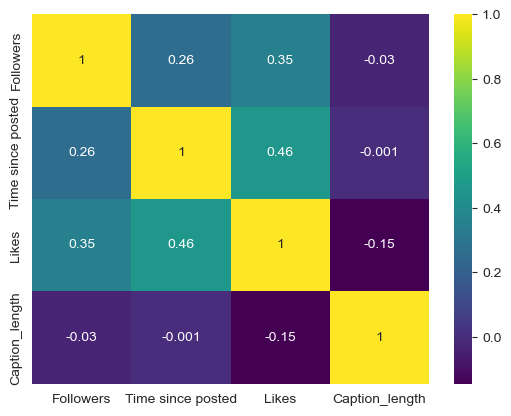

In [28]:
#Corelation
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# split data into train and test
from sklearn.model_selection import train_test_split

In [50]:
# Split Target and Independent Variable
X = df.drop(columns=['Time since posted','Likes','Caption'])
y_time = df['Time since posted']
y_likes=df['Likes']

In [51]:
X

,Followers,Hashtags,Caption_length
0,15.129114,#MachineLearning #AI #DataAnalytics #DataScien...,149
1,13.051350,#deck .#mac #macintosh#sayhello #apple #steve...,454
2,9.382998,#whoiswho #aitrading #ai #aitradingteam#instat...,704
3,10.165154,#iot #cre#workplace #CDO #bigdata #technology#...,4
4,9.856157,#instamachinelearning #instabigdata#instamarke...,322
...,...,...,...
95,11.901835,#beverlyhills #realestate#losangelesrealestate...,204
96,10.966280,#workspace #work #developer#development #devel...,79
97,8.515065,#books #book #motivation #inspiration #life#bo...,261
98,16.036052,#heavyequipment #underconstruction#dozer #real...,390


In [52]:
#Train_test_split
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_time_train, y_time_test, y_likes_train, y_likes_test = train_test_split(
    X, y_time, y_likes, test_size=0.2, random_state=55)

In [54]:
X_train

,Followers,Hashtags,Caption_length
87,9.454951,#grassroots #development#kidsplayingfootball #...,114
70,14.101997,#weekend #chill #chilling #Summer#founder #sta...,29
73,16.621825,#bitcoinsuperstar #tonylocorriere#blockchain #...,145
90,12.987166,#developer #coding #programmer #javascript #pr...,5
92,7.226985,#cybersecurity #programmer #development#nerd #...,270
...,...,...,...
29,9.623312,#Bitcoin #Cryptocurrency#Ethereum #stockmarket...,104
75,16.943295,#rareplanet #shopatrareplanet #India#indiangoo...,74
39,15.129114,#MachineLearning #artificialintelligence#AI #IoT,175
26,9.485303,#Repost #Javascript #ReactJS #Ruby #GDPR #Grad...,44


In [55]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (75, 3)
X_test Shape: (19, 3)


In [56]:
print('time_since_posted_train',y_time_train.shape)
print('time_since_posted_test',y_time_test.shape)

time_since_posted_train (75,)
time_since_posted_test (19,)


In [57]:
print('likes_train: ', y_likes_train.shape)
print('likes_test: ', y_likes_test.shape)

likes_train:  (75,)
likes_test:  (19,)


In [58]:
X_train

,Followers,Hashtags,Caption_length
87,9.454951,#grassroots #development#kidsplayingfootball #...,114
70,14.101997,#weekend #chill #chilling #Summer#founder #sta...,29
73,16.621825,#bitcoinsuperstar #tonylocorriere#blockchain #...,145
90,12.987166,#developer #coding #programmer #javascript #pr...,5
92,7.226985,#cybersecurity #programmer #development#nerd #...,270
...,...,...,...
29,9.623312,#Bitcoin #Cryptocurrency#Ethereum #stockmarket...,104
75,16.943295,#rareplanet #shopatrareplanet #India#indiangoo...,74
39,15.129114,#MachineLearning #artificialintelligence#AI #IoT,175
26,9.485303,#Repost #Javascript #ReactJS #Ruby #GDPR #Grad...,44


In [59]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

In [60]:
#X_train['Caption'] = vectorizer.fit_transform(X_train['Caption']).toarray()
X_train['Hashtags'] = vectorizer.fit_transform(X_train['Hashtags']).toarray()

In [61]:
#X_test['Caption'] = vectorizer.fit_transform(X_test['Caption']).toarray()
X_test['Hashtags'] = vectorizer.fit_transform(X_test['Hashtags']).toarray()

In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [63]:
# Define the ensemble of models
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor())
]

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
# Train and evaluate each model
for name, model in models:
    # Define the pipeline for training the model
    pipeline = Pipeline([
        ('regressor', model)
    ])

    # Train the model for predicting the number of likes
    pipeline.fit(X_train, y_likes_train)

    # Make predictions for the number of likes
    likes_predictions = pipeline.predict(X_test)

    # Compute the evaluation metrics for the number of likes
    likes_mse = mean_squared_error(y_likes_test, likes_predictions)
    likes_mae = mean_absolute_error(y_likes_test, likes_predictions)
    likes_r2 = r2_score(y_likes_test, likes_predictions)

    # Print the model name and evaluation metrics for the number of likes
    print("Model:", name)
    print("Likes MSE:", likes_mse)
    print("Likes MAE:", likes_mae)
    print("Likes R^2 Score:", likes_r2)
    print()

    # Train the model for predicting the time since posted
    pipeline.fit(X_train, y_time_train)

    # Make predictions for the time since posted
    time_predictions = pipeline.predict(X_test)

    # Compute the evaluation metrics for the time since posted
    time_mse = mean_squared_error(y_time_test, time_predictions)
    time_mae = mean_absolute_error(y_time_test, time_predictions)
    time_r2 = r2_score(y_time_test, time_predictions)

    # Print the model name and evaluation metrics for the time since posted
    print("Model:", name)
    print("Time MSE:", time_mse)
    print("Time MAE:", time_mae)
    print("Time R^2 Score:", time_r2)
    print()


Model: Random Forest
Likes MSE: 0.10441681149136534
Likes MAE: 0.2445435091681339
Likes R^2 Score: -0.457746898483258

Model: Random Forest
Time MSE: 20.614747368421053
Time MAE: 2.782105263157894
Time R^2 Score: -12.056006666666667

Model: Gradient Boosting
Likes MSE: 0.11329008497589095
Likes MAE: 0.26450226876297017
Likes R^2 Score: -0.5816252923617247

Model: Gradient Boosting
Time MSE: 42.794717452671804
Time MAE: 3.315107112638152
Time R^2 Score: -26.10332105335881

Model: XGBoost
Likes MSE: 0.09950524578861746
Likes MAE: 0.25947272669462534
Likes R^2 Score: -0.38917729204139184

Model: XGBoost
Time MSE: 49.93224386232429
Time MAE: 3.3141627374448275
Time R^2 Score: -30.62375444613872

